In [38]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib import*
import matplotlib.pyplot as plt
from matplotlib import cm 
from scipy import stats
from sklearn.decomposition import PCA as sklearnPCA
import seaborn
import io


In [3]:
from google.colab import files
uploaded = files.upload()

Saving Acoustic.csv to Acoustic.csv


In [48]:
d1=pd.read_csv("GlottalPCA.csv")
d1.head(5)

,Unnamed: 0,AQ_kurt,AQ_max,AQ_mean,AQ_median,AQ_min,AQ_skew,AQ_std,ClQ_kurt,ClQ_max,...,SQ1_std,SQ2_kurt,SQ2_max,SQ2_mean,SQ2_median,SQ2_min,SQ2_skew,SQ2_std,Unnamed: 67,label
0,0,-1.125019,0.001362,0.000734,0.000578,0.000025,0.399345,0.000339,-1.513942,0.635115,...,0.675402,0.308816,2.674824,1.157275,1.006275,0.075223,0.952797,0.536728,NaN,1
1,1,NaN,0.000273,0.000273,0.000273,0.000273,NaN,NaN,NaN,0.212901,...,NaN,NaN,2.212919,2.212919,2.212919,2.212919,NaN,NaN,NaN,1
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,3,-1.030347,0.001417,0.000791,0.000885,0.000069,-0.182928,0.000360,-0.023530,0.869753,...,1.185508,35.373686,8.356877,0.872556,0.715124,0.000000,5.312221,0.945553,NaN,1
4,4,-0.485704,0.000403,0.000215,0.000237,0.000046,0.101187,0.000095,-0.931441,0.839397,...,2.236482,18.286592,6.931799,0.688371,0.341031,0.084272,4.242434,1.524225,NaN,1


In [49]:
df1=d1.replace(np.nan,0,regex=True)

In [61]:

from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 


# Encode labels in column 'species'. 
df1['label']= label_encoder.fit_transform(df1['label'])
df1.head()

,Unnamed: 0,AQ_kurt,AQ_max,AQ_mean,AQ_median,AQ_min,AQ_skew,AQ_std,ClQ_kurt,ClQ_max,...,SQ1_std,SQ2_kurt,SQ2_max,SQ2_mean,SQ2_median,SQ2_min,SQ2_skew,SQ2_std,Unnamed: 67,label
0,0,-1.125019,0.001362,0.000734,0.000578,0.000025,0.399345,0.000339,-1.513942,0.635115,...,0.675402,0.308816,2.674824,1.157275,1.006275,0.075223,0.952797,0.536728,0.0,1
1,1,0.000000,0.000273,0.000273,0.000273,0.000273,0.000000,0.000000,0.000000,0.212901,...,0.000000,0.000000,2.212919,2.212919,2.212919,2.212919,0.000000,0.000000,0.0,1
2,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1
3,3,-1.030347,0.001417,0.000791,0.000885,0.000069,-0.182928,0.000360,-0.023530,0.869753,...,1.185508,35.373686,8.356877,0.872556,0.715124,0.000000,5.312221,0.945553,0.0,1
4,4,-0.485704,0.000403,0.000215,0.000237,0.000046,0.101187,0.000095,-0.931441,0.839397,...,2.236482,18.286592,6.931799,0.688371,0.341031,0.084272,4.242434,1.524225,0.0,1


In [51]:
X_std=StandardScaler().fit_transform(df1)

C:\Users\Ashwin Ram\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Ashwin Ram\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [8]:
mean_vec=np.mean(X_std,axis=0)
cov_mat=(X_std-mean_vec).T.dot((X_std-mean_vec)/(X_std.shape[0]-1))
print("covaariance matrix \n%s" %cov_mat)


covaariance matrix 
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          1.0002784   0.31257763 ... -0.1212777  -0.04925908
   0.04159688]
 [ 0.          0.31257763  1.0002784  ... -0.02722904  0.14842019
   0.1655405 ]
 ...
 [ 0.         -0.1212777  -0.02722904 ...  1.0002784   0.36417449
   0.1158777 ]
 [ 0.         -0.04925908  0.14842019 ...  0.36417449  1.0002784
   0.07428568]
 [ 0.          0.04159688  0.1655405  ...  0.1158777   0.07428568
   1.0002784 ]]


cov_mat=np.cov(X_std.T)
eig_vals,eig_vect=np.linalg.eig(cov_mat)
print("eigen values \n%s"%eig_vals)
print("eigen vectors \n%s"%eig_vect)

In [52]:
cov_mat=np.cov(X_std.T)
eig_vals,eig_vect=np.linalg.eig(cov_mat)
print("eigen values \n%s"%eig_vals)
print("eigen vectors \n%s"%eig_vect)


eigen values 
[2.31780816e+01 1.04003889e+01 6.84325889e+00 4.37757530e+00
 3.43915909e+00 2.29015287e+00 2.08014562e+00 1.81622693e+00
 1.47982922e+00 1.16352971e+00 1.06965197e+00 1.05840053e+00
 9.75656317e-01 9.15986614e-01 7.44671551e-01 6.70258005e-01
 5.68049804e-01 5.11946000e-01 4.99745601e-01 4.11516032e-01
 3.87162995e-01 3.45807485e-01 2.88186672e-01 2.76825413e-01
 2.49455932e-01 2.29592350e-01 2.09469957e-01 1.88078899e-01
 1.84743451e-01 1.59095581e-01 1.47097543e-01 1.39840164e-01
 1.25050242e-01 1.08227192e-01 1.02855008e-01 8.53555404e-02
 7.56659290e-02 7.00539167e-02 6.03345236e-02 5.14272782e-02
 4.13003157e-02 3.91588543e-02 3.07482047e-02 2.93285273e-02
 2.80866893e-02 2.46004599e-02 2.20866053e-02 1.85115034e-02
 1.78418850e-02 1.75024931e-02 1.25064423e-02 1.17853019e-02
 1.11126764e-02 1.01942825e-02 8.25117642e-03 6.62938302e-03
 5.62130991e-03 4.36285553e-03 3.99690963e-03 3.90175615e-03
 4.47163550e-04 7.24575747e-04 1.08262748e-03 2.54324945e-03
 2.3472852

In [10]:
eig_pairs=[(np.abs(eig_vals[i],eig_vect[1,i]) for i in range(len(eig_vals)))]
print("Eigen values in descending order")
for i in eig_vals:
     print(i)

Eigen values in descending order
81.37409841798637
41.718969377897274
19.899859777606444
18.761417503869517
12.255942103988946
9.905063484541017
8.978942291122218
8.630128372381607
7.415670039522908
6.751664643139319
5.973411888429881
5.705544363460866
5.040130890265087
4.432188631938002
4.379252395079616
4.014154244403132
3.691826712157229
3.551459734394693
3.0583952190195682
2.97346803571481
2.8368169589502052
2.688992147720281
2.6585157697370074
2.4652559826229403
2.4429727328116435
2.3550920718255797
2.220492803658374
2.1467589223896737
2.095535600599991
2.0524386925070717
1.9952723643793566
1.9530207973433216
1.8189727715585038
1.7739891051740346
1.6884084122526875
1.669529420877202
1.648277840451507
1.5917133987078975
1.5490888342503355
1.5425250058726498
1.509014765348627
1.489106891300222
1.4310565982207144
1.4275152323711537
1.4049531766116479
1.381425520138366
1.3543822463029482
1.3004082624160371
1.2895064703332695
1.2391289336638274
1.2154775385629515
1.1851988190123113
1.1

In [62]:
from sklearn.decomposition import PCA


In [63]:
pca=PCA(n_components=30)
pca.fit_transform(X_std)
print(pca.explained_variance_ratio_)

[0.33916674 0.15218973 0.10013796 0.06405741 0.05032549 0.03351199
 0.03043894 0.026577   0.02165446 0.01702602 0.0156523  0.01548766
 0.01427686 0.01340371 0.01089684 0.00980794 0.00831232 0.00749135
 0.00731282 0.00602175 0.00566539 0.00506023 0.00421706 0.00405081
 0.00365031 0.00335964 0.00306519 0.00275217 0.00270337 0.00232806]


In [64]:
X_std.shape

(202, 69)

In [65]:
X_pca=pca.transform(X_std)
X_pca.shape

(202, 30)

In [66]:
X_pca

array([[-1.61483236,  0.98474876, -2.84783228, ..., -0.47871126,
        -0.22882059,  0.05275433],
       [-0.10455755,  4.04303191,  5.72445272, ...,  0.25497964,
        -0.10231713, -0.62542243],
       [11.5480847 ,  0.17298285, -0.66205601, ..., -0.14779424,
         0.21524881,  0.15890817],
       ...,
       [-2.18197559, -2.09491954,  2.53205047, ..., -0.59473609,
         0.2448046 ,  0.324717  ],
       [-3.50497376, -6.259832  , -3.32484577, ...,  0.62305255,
        -1.05849377,  0.27100793],
       [-1.28939444, -4.30856438,  4.64983005, ...,  0.34184105,
        -0.17857506,  0.24120748]])

In [72]:
pca.explained_variance_ratio_

array([0.33916674, 0.15218973, 0.10013796, 0.06405741, 0.05032549,
       0.03351199, 0.03043894, 0.026577  , 0.02165446, 0.01702602,
       0.0156523 , 0.01548766, 0.01427686, 0.01340371, 0.01089684,
       0.00980794, 0.00831232, 0.00749135, 0.00731282, 0.00602175,
       0.00566539, 0.00506023, 0.00421706, 0.00405081, 0.00365031,
       0.00335964, 0.00306519, 0.00275217, 0.00270337, 0.00232806])

In [83]:
a = numpy.asarray(X_pca)
# df1['label']

In [80]:
np.append(a,df1['label'])

array([-1.61483236,  0.98474876, -2.84783228, ...,  0.        ,
        0.        ,  0.        ])

In [81]:
numpy.savetxt("pca.csv", a, delimiter=",")

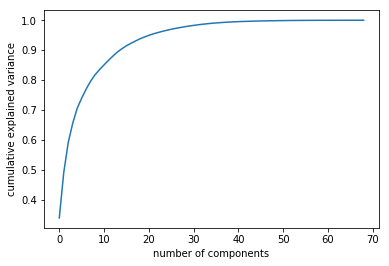

In [60]:
pca=PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [ ]:
#plt.figure(flagsize=(1,0))
#plt.scatter(X_pca[1,0],X_pca[1,0],d1)
#plt.xlabel('number of components')
#plt.ylabel('cumulative explained variance')

In [96]:
df = pd.read_csv("pca.csv")
df.fillna(0, inplace=True)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib import*
import matplotlib.pyplot as plt
from matplotlib import cm 
from scipy import stats
from sklearn.decomposition import PCA as sklearnPCA
import seaborn
import io


from google.colab import files
uploaded = files.upload()

d1=pd.read_csv("GlottalPCA.csv")
d1.head(5)

df1=d1.replace(np.nan,0,regex=True)


from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 


# Encode labels in column 'species'. 
df1['label']= label_encoder.fit_transform(df1['label'])
df1.head()

X_std=StandardScaler().fit_transform(df1)

mean_vec=np.mean(X_std,axis=0)
cov_mat=(X_std-mean_vec).T.dot((X_std-mean_vec)/(X_std.shape[0]-1))
print("covaariance matrix \n%s" %cov_mat)


cov_mat=np.cov(X_std.T)
eig_vals,eig_vect=np.linalg.eig(cov_mat)
print("eigen values \n%s"%eig_vals)
print("eigen vectors \n%s"%eig_vect)

cov_mat=np.cov(X_std.T)
eig_vals,eig_vect=np.linalg.eig(cov_mat)
print("eigen values \n%s"%eig_vals)
print("eigen vectors \n%s"%eig_vect)


eig_pairs=[(np.abs(eig_vals[i],eig_vect[1,i]) for i in range(len(eig_vals)))]
print("Eigen values in descending order")
for i in eig_vals:
     print(i)

from sklearn.decomposition import PCA


pca=PCA(n_components=30)
pca.fit_transform(X_std)
print(pca.explained_variance_ratio_)

X_std.shape

X_pca=pca.transform(X_std)
X_pca.shape

X_pca

pca.explained_variance_ratio_

a = numpy.asarray(X_pca)
# df1['label']

np.append(a,df1['label'])

numpy.savetxt("pca.csv", a, delimiter=",")

pca=PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#plt.figure(flagsize=(1,0))
#plt.scatter(X_pca[1,0],X_pca[1,0],d1)
#plt.xlabel('number of components')
#plt.ylabel('cumulative explained variance')

df = pd.read_csv("pca.csv")
df.fillna(0, inplace=True)